In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud/card_transdata.csv


**We start with reading the dataset** 

In [32]:
df = pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')
df.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


**shape : to get the number of rows in the dataset**

In [33]:
df.shape[0]

1000000

**To get some statistics insights like max & min ,etc**

In [34]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


**to look into distinct values attcahed to each field**

In [35]:
df['distance_from_last_transaction'].value_counts()

0.311140    1
3.640681    1
3.095558    1
3.273022    1
0.245656    1
           ..
3.680817    1
0.367765    1
0.841772    1
3.321236    1
0.318110    1
Name: distance_from_last_transaction, Length: 1000000, dtype: int64

In [36]:
df['repeat_retailer'].value_counts()

1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64

**check if there are any nulls in the dataset**

In [37]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

**check distinct target values**

In [38]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

its a binary classification problem since we have only two values in target.
Also it suffers from data imbalance which we'll handle later.

(array([912597.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  87403.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

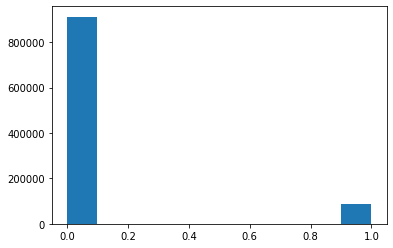

In [39]:
import matplotlib.pyplot as plt 
plt.hist(df['fraud'])

In [40]:
df1 = df.drop('fraud',axis = 1)

In [41]:
X = df1
y = df.fraud

**This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short**

What is data Augmentation?

Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data.

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state = 1 )
X_sam,y_sam = sm.fit_resample(X,y)
df_sam = pd.concat([pd.DataFrame(X_sam) , pd.DataFrame(y_sam)] , axis = 1)

In [43]:
df_sam['fraud'].value_counts()

0.0    912597
1.0    912597
Name: fraud, dtype: int64

**Now we have a balanced data.** 

Why balance a dataset?

cause any imbalance in the data will induce a bias in your predictions.Certain algorithms like RandomForest DecisionTree etc are somewhat immune to this but its always a good practice to provide a balanced dataset to your algorithm.

In [44]:
X = df_sam.drop('fraud',axis = 1)
y = df_sam.fraud

**Spliting the dataset into train and test splits**

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 1)

In [46]:
X_train.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
1432106,111.727714,0.336782,4.899174,1.0,1.0,0.0,1.0
1252688,7.454500,0.076046,5.464701,1.0,1.0,0.0,1.0
1620237,30.153849,0.789766,5.415212,1.0,1.0,0.0,1.0
797537,12.207121,0.794653,0.091244,1.0,1.0,1.0,0.0
1554133,237.961207,0.099970,3.546156,1.0,0.0,0.0,1.0
651267,16.744758,0.546207,1.900343,1.0,0.0,0.0,0.0
1417860,42.639715,0.077928,7.939371,1.0,0.0,0.0,1.0
180635,3.334207,1.456278,5.788227,1.0,1.0,0.0,1.0
626687,7.781121,4.191708,14.076901,1.0,0.0,0.0,1.0
1530976,239.112691,4.064549,1.435863,1.0,0.0,0.0,1.0


In [47]:
X_test.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
1040127,113.155873,1.742386,1.257159,1.0,0.0,0.0,1.0
1647673,12.917258,0.858022,13.005971,1.0,0.0,0.0,1.0
1574520,12.961956,39.502717,10.676442,1.0,0.0,0.0,1.0
851411,46.032458,0.443862,0.164797,1.0,0.0,0.0,1.0
956155,3.017074,2.189098,4.924966,1.0,0.0,0.0,1.0
190373,6.476201,5.567201,1.271082,1.0,1.0,0.0,0.0
1082016,394.999959,0.570813,3.995784,1.0,0.0,0.0,1.0
173863,131.654235,1.268462,3.759904,1.0,1.0,0.0,1.0
227177,7.752396,0.345278,0.643894,1.0,1.0,0.0,0.0
317011,6.626464,0.116585,0.172160,1.0,0.0,0.0,0.0


**Use standard Scalar to scale the inputs into particular range .**

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
X_train[0]

array([ 0.65318936, -0.21555993,  0.25642125,  0.36820263,  1.5243124 ,
       -0.24490798,  0.5260506 ])

In [51]:
y_train[0]

0.0

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [53]:
lr.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred = lr.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score , precision_score , recall_score ,f1_score


In [56]:
acc = accuracy_score(y_test,y_pred)
ps = precision_score(y_test,y_pred)
rs = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [57]:
acc , ps , rs ,f1

(0.9416308942332189,
 0.9342580839482799,
 0.9503022676915501,
 0.9422118798293504)

**We are getting an accuracy of 94 % with logisticRegression ( which rarely gives results this good).** 

Can we use any other algo?
Sure we can . you try a bunch of algos and see what gives you best results, This dataset is quite clean so we did not have to do a whole lot of preprocessing & cleaning. Even without any parameter tuning we have 94 % accuracy. 

Also this code can be improved by adding columnTransformers and pipelines to make the deployment much simpler.

In [58]:
import joblib

joblib.dump(lr, "credit_model.pkl")

['credit_model.pkl']

In [59]:
joblib.dump(sc, "scaler.pkl")

['scaler.pkl']

In [61]:
import joblib

model = joblib.load("credit_model.pkl")
scaler = joblib.load("scaler.pkl")  # if used